<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Подготовка данных

Импортируем библиотеки которые нам понадобятся или могут понадобиться.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
import time

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.scorer import make_scorer

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

У нас 3 датасета:
- full это полный датасет
- train это датасет с обучающими данными
- test это данные из будущего на которых мы будем тестить нашу модель

In [3]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Глянем на общую информацию датасета целиком.

In [4]:
dates = data_full, data_train, data_test

In [5]:
for i in range(len(dates)):
    display(dates[i].info(), '-'*80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

None

'--------------------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

None

'--------------------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

None

'--------------------------------------------------------------------------------'

Мы посмотрели общую инфу о датасете и видим, что типы данных в них правильные (числовые) за исключением столбца "date". Исправим тип данный для этого столбца.

Видим, что столбец "date" имеет неправильный тип данных. Переведем в правильный.

In [6]:
for i in range(len(dates)):
    dates[i]['date'] = pd.to_datetime(dates[i]['date'], format='%Y-%m-%d %H:%M:%S')

У нас есть столбец "rougher.output.recovery" который показывает эфективность обогащения. Для начала проверим правильность его подсчетов тем самым поймем что из чего складывается. Сравним наши подсчеты с уже существующим столбцом, проверим качество на метрике MAE.

Напишем функция которая будет искать нужные совпадения букв в датасете нужной нам колонки.

In [7]:
def search(word1, word2):
    for i in data_full.columns:
        if word1 in i and word2 in i:
            print(i)

In [8]:
search('rougher', 'au')

rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.input.feed_au
rougher.output.concentrate_au
rougher.output.tail_au


In [9]:
search('out', 'recovery')

final.output.recovery
rougher.output.recovery


In [10]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
R = data_train['rougher.output.recovery']

In [11]:
df = pd.DataFrame({'C': C,
                   'F': F,
                   'T': T,
                   'R_old': R
})

In [12]:
df['R_new'] = ((df['C'] * (df['F'] - df['T'])) / (df['F'] * (df['C'] - df['T']))) * 100

In [13]:
df

,C,F,T,R_old,R_new
0,19.793808,6.486150,1.170244,87.107763,87.107763
1,20.050975,6.478583,1.184827,86.843261,86.843261
2,19.737170,6.362222,1.162562,86.842308,86.842308
3,19.320810,6.118189,1.079755,87.226430,87.226430
4,19.216101,5.663707,1.012642,86.688794,86.688794
...,...,...,...,...,...
14144,18.603550,5.335862,0.748633,89.574376,89.574376
14145,18.441436,4.838619,0.771582,87.724007,87.724007
14146,15.111231,4.525061,0.685059,88.890579,88.890579
14147,17.834772,4.362781,0.567130,89.858126,89.858126


In [14]:
mae = mean_absolute_error(df['R_old'], df['R_new'])
print('MAE между нашими расчетами и значением признака =', mae)

MAE между нашими расчетами и значением признака = 9.682896147825551e-15


Это значит, что в среднем мы ошибаемся на 9.68*10^(-15) единицы. Получается очень маленькое число 0.000... . Мы получили числа которые оказались практически равны подсчетам по оригинальному столбцу. Значит мы все сделали верно.

Найдем признаки которых нет в тестовой выборке.

In [15]:
for i in data_train.columns:
    if i not in data_test.columns:
        print(i)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

- Видно, что эти признаков нет в тестовой выборке:
    1. Финальная характеристики после обработки -> концентраты металов, эффективность обогащения, хвосты металов.
    2. Первичная очистка после обрабоки -> концентратов металов, хвостов металов.
    3. Флотация по расчетный характеристикам -> добавление разных пропроций.
    4. Флотация после обработки -> концетратов металов, эффективность обогощения и хвосты металов.
    5. Вторичный этап очистки после обработки -> хвостов металов.
    
Это все этапы после обработки. Их невозможно получить/измерить во время выполнения технологического процесса.

Проведем предобработку данных. Заменим пропуски.  
Для начала посмотрим сколько пропусков в каждом датасете.

In [16]:
text = ['data_full', 'data_train', 'data_test']
for i in range(len(dates)):
    display('-'*40, text[i], '-'*40, dates[i].isna().mean())

'----------------------------------------'

'data_full'

'----------------------------------------'

date                                          0.000000
final.output.concentrate_ag                   0.000051
final.output.concentrate_pb                   0.000051
final.output.concentrate_sol                  0.010854
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000051
secondary_cleaner.state.floatbank5_b_air      0.000051
secondary_cleaner.state.floatbank5_b_level    0.000051
secondary_cleaner.state.floatbank6_a_air      0.000103
secondary_cleaner.state.floatbank6_a_level    0.000051
Length: 87, dtype: float64

'----------------------------------------'

'data_train'

'----------------------------------------'

date                                          0.000000
final.output.concentrate_ag                   0.000071
final.output.concentrate_pb                   0.000071
final.output.concentrate_sol                  0.014913
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000071
secondary_cleaner.state.floatbank5_b_air      0.000071
secondary_cleaner.state.floatbank5_b_level    0.000071
secondary_cleaner.state.floatbank6_a_air      0.000141
secondary_cleaner.state.floatbank6_a_level    0.000071
Length: 87, dtype: float64

'----------------------------------------'

'data_test'

'----------------------------------------'

date                                          0.000000
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.depressant              0.000945
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.000756
primary_cleaner.state.floatbank8_a_air        0.000000
primary_cleaner.state.floatbank8_a_level      0.000000
primary_cleaner.state.floatbank8_b_air        0.000000
primary_cleaner.state.floatbank8_b_level      0.000000
primary_cleaner.state.floatbank8_c_air        0.000000
primary_cleaner.state.floatbank8_c_level      0.000000
primary_cleaner.state.floatbank8_d_air        0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.000000
rougher.input.feed_rate                       0.000567
rougher.input.feed_size                       0.000189
rougher.input.feed_sol                        0.003970
rougher.in

У функции fillna есть аргумент который заменяет пустые значения по ближайшим соседям. Сделаем замену по ближайшим соседям т.к. в ТЗ сказанно что, - "Данные индексируются датой и временем получения информации и соседние по времени параметры часто похожи." Заменим пропуски отдельно на обучающей и тестовой датасетах.

In [17]:
data_train.fillna(method='ffill', inplace=True)
data_test.fillna(method='ffill', inplace=True)

In [18]:
for i in range(len(dates)):
    print(text[i], dates[i].isna().mean().sum())

data_full 0.23051597304388083
data_train 0.0
data_test 0.0


Данные предобработанны

# Анализ данных

- Проанализируем данные
    1. Посмотрим, как меняется концентрация металлов (Au-золото, Ag-серебро, Pb-свинец) на различных этапах очистки.
    2. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.
    3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Найдем все концентраты металов на различных этапах очистки.

In [19]:
stage = ['rougher', 'primary_cleaner', 'secondary_cleaner', 'final']
metal = ['concentrate_au', 'concentrate_ag', 'concentrate_pb']
for i in metal:
    print()
    for a in range(len(stage)):
        search(stage[a], i)


rougher.output.concentrate_au
primary_cleaner.output.concentrate_au
final.output.concentrate_au

rougher.output.concentrate_ag
primary_cleaner.output.concentrate_ag
final.output.concentrate_ag

rougher.output.concentrate_pb
primary_cleaner.output.concentrate_pb
final.output.concentrate_pb


In [20]:
values = [('au', ['date', 'rougher.output.concentrate_au',
                'primary_cleaner.output.concentrate_au',
                'final.output.concentrate_au']),
         ('ag', ['date', 'rougher.output.concentrate_ag',
                'primary_cleaner.output.concentrate_ag',
                'final.output.concentrate_ag']),
         ('pb', ['date', 'rougher.output.concentrate_pb',
                'primary_cleaner.output.concentrate_pb',
                'final.output.concentrate_pb'])]

df = []
for a, b in values:
    a = data_train[b]
    df.append(a)

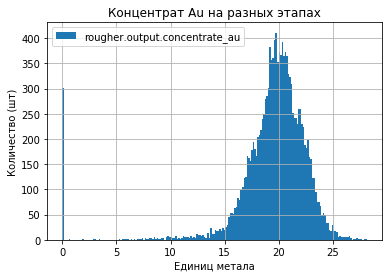

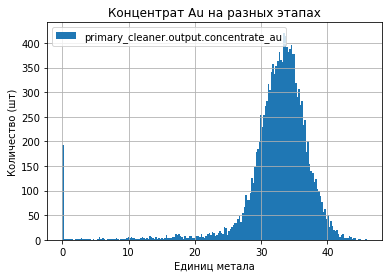

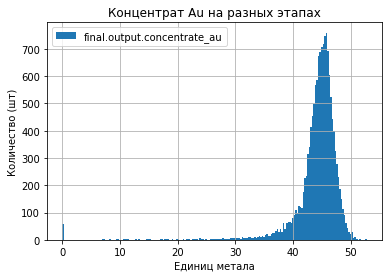

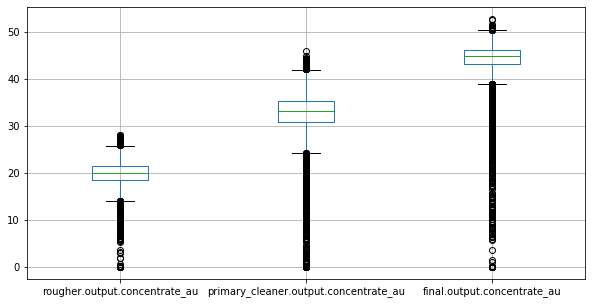

In [21]:
for i in ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',
          'final.output.concentrate_au']:
    df[0].pivot_table(index='date', values=i).plot.hist(bins=200, legend=True, grid=True)
    plt.title('Концентрат Аu на разных этапах')
    plt.xlabel('Единиц метала')
    plt.ylabel('Количество (шт)')
    plt.show()
df[0].boxplot(figsize=(10,5))
plt.show()

Мы видим концентрат золота на разных этапах. Заметно большое количество выбросов возле 0. Это может быть руда которая и вовсе не обогощена нужным нам металом. Так, что убирать эти выбросы не буду. Мне кажется для модели это нужная инфа, чтобы она видела и 0 концентраты "пустой руды". А сама концентрация можно сказать на МАХ.

Посмотрим на распределение контентрации металов.

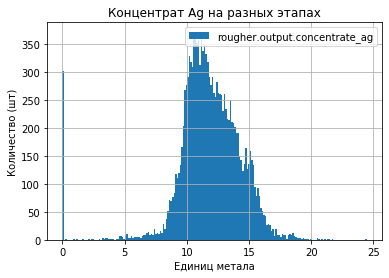

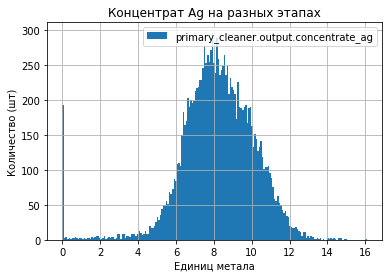

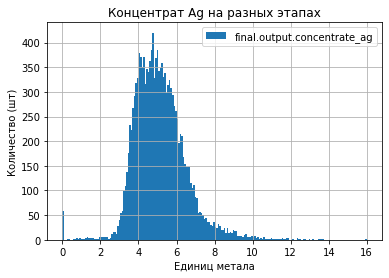

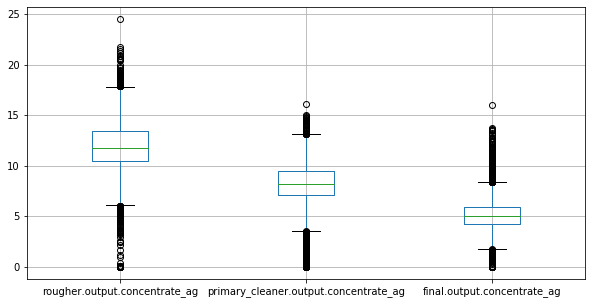

In [22]:
for i in ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag',
          'final.output.concentrate_ag']:
    df[1].pivot_table(index='date', values=i).plot.hist(bins=200, legend=True, grid=True)
    plt.title('Концентрат Аg на разных этапах')
    plt.xlabel('Единиц метала')
    plt.ylabel('Количество (шт)')
    plt.show()
df[1].boxplot(figsize=(10,5))
plt.show()

Концентрация серебра уже съехала к середине и так же наблюдаем болшое количество выбросов.  
Гляем как дела у свинца.

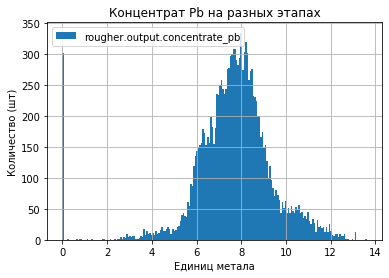

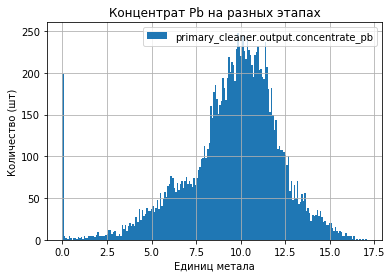

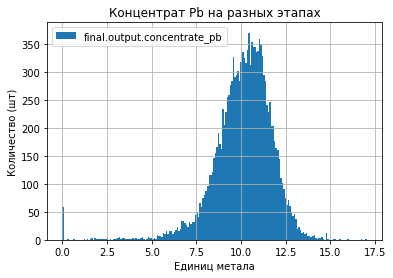

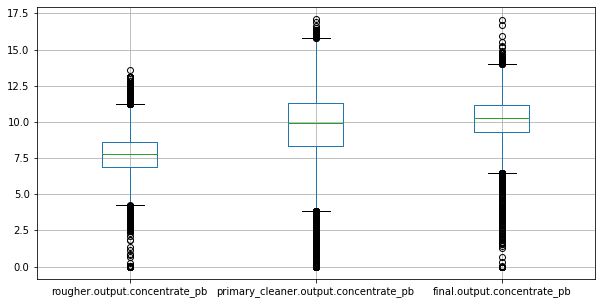

In [23]:
for i in ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb',
          'final.output.concentrate_pb']:
    df[2].pivot_table(index='date', values=i).plot.hist(bins=200, legend=True, grid=True)
    plt.title('Концентрат Pb на разных этапах')
    plt.xlabel('Единиц метала')
    plt.ylabel('Количество (шт)')
    plt.show()
df[2].boxplot(figsize=(10,5))
plt.show()

Со свинцом такая же ситуация как и с серебром.

Сравним гранулы сырья на обучайющей выборке и на тестовой. Через нашу функцию найдем гранулы.

In [24]:
search('input', 'feed_size')

primary_cleaner.input.feed_size
rougher.input.feed_size


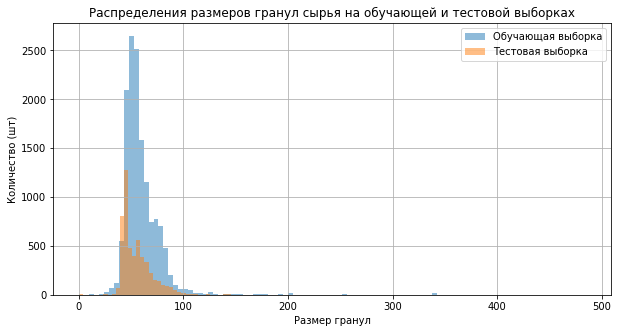

In [25]:
plt.figure(figsize=(10,5))
plt.hist(data_train['rougher.input.feed_size'], alpha = 0.5, label='Обучающая выборка', bins=100)
plt.hist(data_test['rougher.input.feed_size'], alpha = 0.5, label='Тестовая выборка', bins =100)
plt.xlabel('Размер гранул')
plt.ylabel('Количество (шт)')
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках')
plt.legend()
plt.grid(True)
plt.show()

Как видно основные распределения не сильно отличаются друг от друга, т.к. если у нас на тестовой выборке было бы другое распределение, то тогда моель получила значения которые никогда не видила и у нас была бы низкая метрика у модели.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [26]:
search('concentrate', '')

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au


In [27]:
search('input', '')

primary_cleaner.input.sulfate
primary_cleaner.input.depressant
primary_cleaner.input.feed_size
primary_cleaner.input.xanthate
rougher.input.feed_ag
rougher.input.feed_pb
rougher.input.feed_rate
rougher.input.feed_size
rougher.input.feed_sol
rougher.input.feed_au
rougher.input.floatbank10_sulfate
rougher.input.floatbank10_xanthate
rougher.input.floatbank11_sulfate
rougher.input.floatbank11_xanthate


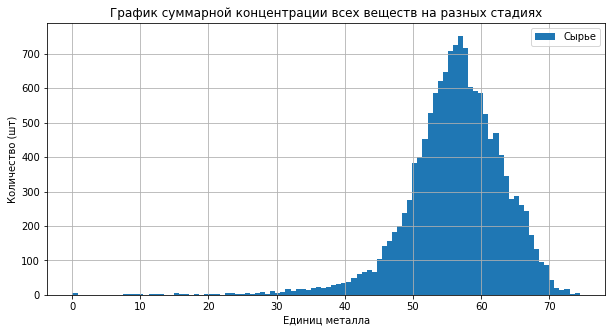

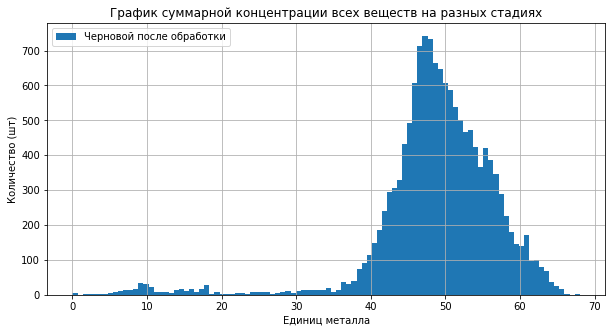

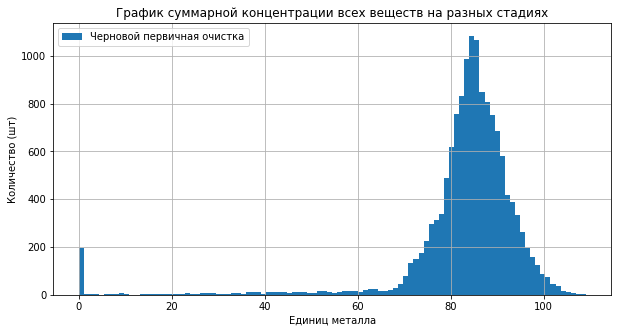

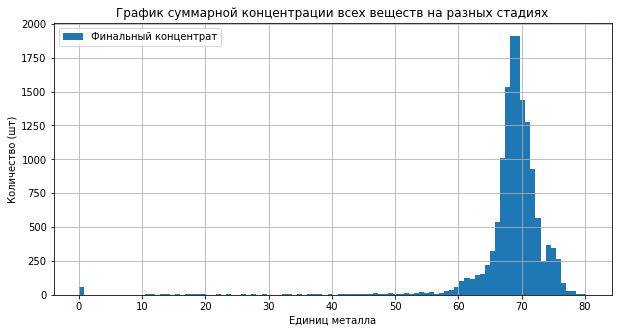

In [28]:
rougher_input = data_train[['rougher.input.feed_au', 'rougher.input.feed_sol',
                                 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis='columns')
rougher_output = data_train[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_sol',
                                         'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']].sum(axis='columns')
primary_cleaner = data_train[['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_sol',
                              'primary_cleaner.output.concentrate_ag', 
                              'primary_cleaner.output.concentrate_au']].sum(axis='columns')
final_output = data_train[['final.output.concentrate_au', 'final.output.concentrate_sol', 
                           'final.output.concentrate_ag', 'final.output.concentrate_pb']].sum(axis='columns')

values = rougher_input, rougher_output, primary_cleaner, final_output
name = ['Сырье', 'Черновой после обработки', "Черновой первичная очистка", "Финальный концентрат"]
for i in range(len(values)):
    plt.figure(figsize=(10,5))
    plt.hist(values[i], label=name[i], bins=100)
    plt.xlabel('Единиц металла')
    plt.ylabel('Количество (шт)')
    plt.title('График суммарной концентрации всех веществ на разных стадиях')
    plt.legend()
    plt.grid(True)
    plt.show()

Видим, что у нас есть аномалии 0 на суммароной концентрации. Это значит, что в сложении объектов были 0 во всех признаках. Нам это ни к чему и для алгоритма они не несут ни какой инфы, это лишняя нагрузка. Избавимся от этих выбрасов, но сначала глянем сколько "обрезать".

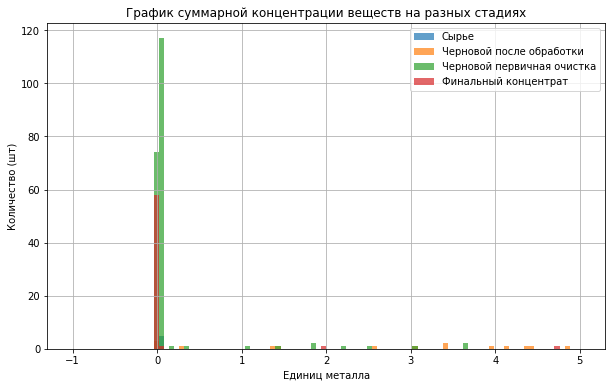

In [29]:
for i in range(len(values)):
    values[i].hist(figsize=(10,6), grid=True, range=(-1, 5), label=name[i], alpha=0.7, bins=100)
    plt.title('График суммарной концентрации веществ на разных стадиях')
    plt.xlabel('Единиц металла')
    plt.ylabel('Количество (шт)')
    plt.legend()

Видим, что надо нам удалить столбцы, где значение = 0. Дело в том, что нам нужнен хоть грамм чего-нибудь в руде. А если мы имеем ноль, значит большая вероятность неточности измерений.

Удалим значение равные 0.

In [30]:
data_train.shape

(14149, 87)

In [31]:
index = []
for i in values:
    index.append(i[i == 0])

index = pd.DataFrame(data=index, index=[0, 1, 2, 3])

data_train = data_train.drop(index=index.columns).reset_index(drop=True)
data_train.shape

(14019, 87)

# Построение модели

- Построим модель
    1. Напишем функцию для вычисления итоговой sMAPE (кастомная).
    2. Обучим разные модели и оцените их качество кросс-валидацией. Выберем лучшую модель и проверем её на тестовой выборке.

Напишем функцию для вычисления sMAPE

In [32]:
def smape(target, predictions):
    target_rougher = target['rougher.output.recovery']
    predictions_rougher = predictions[:,0]
    target_final = target['final.output.recovery']
    predictions_final = predictions[:,1]
    
    rougher = (abs(target_rougher - predictions_rougher) / ((abs(target_rougher) + abs(predictions_rougher)) / 2)).mean() * 100
    final = (abs(target_final - predictions_final) / ((abs(target_final) + abs(predictions_final)) / 2)).mean() * 100
    
    smape = 0.25 * rougher + 0.75 * final
    return smape

Получим целевой признак для тестового датасета. Добавим значения в таблицу по столбцу.

In [33]:
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

Сохраним признак и целевой признак для обучающего датасета.

In [34]:
columns = data_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1).columns

target_train = data_train[['rougher.output.recovery', 'final.output.recovery']]
features_train = data_train[columns]

target_test = data_test[['rougher.output.recovery', 'final.output.recovery']]
features_test = data_test[columns]

Делаем стандартизацию признаков.

In [35]:
numeric = columns
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Наша кастомная метрика

In [36]:
custom_metric = make_scorer(smape, greater_is_better=True)

Теперь посмотрим 3 модели на кросс-валидации и выберем лучшую.

In [37]:
lienar_model = LinearRegression()
score = cross_val_score(lienar_model, features_train, target_train, cv=3, scoring=custom_metric)
print(score)
print(score.mean())

[11.94811176 15.9768852  16.22562256]
14.716873173827844


In [38]:
tree_model = DecisionTreeRegressor(random_state=0)
score = cross_val_score(tree_model, features_train, target_train, cv=3, scoring=custom_metric)
print(score)
print(score.mean())

[20.26309682 16.98638765 17.28728277]
18.178922412255


In [39]:
forest_model = RandomForestRegressor(random_state=0)
score = cross_val_score(forest_model, features_train, target_train, cv=3, scoring=custom_metric)
print(score)
print(score.mean())

[11.99698951 10.65283346 16.94130228]
13.19704174904854


Видим, что лучший показатель (меньший) у леса.

Напишем функцию которая обучит модель c помощью GridSearchCV.

In [40]:
def clf(x_train, y_train, model, value, number, score):
    clf = model
    parametrs = value
    grid = GridSearchCV(clf,
                    parametrs,
                    cv=number,
                    scoring = score
                   )
    grid.fit(x_train, y_train)
    print(grid.best_params_, grid.best_score_)
    return grid.best_estimator_

In [41]:
%%time
model_final = clf(features_train, target_train, RandomForestRegressor(random_state=42), {'max_depth': [2, 3, 4],
                                                                                         'n_estimators': [80, 100, 120]},
                                                                                          3, custom_metric)

{'max_depth': 2, 'n_estimators': 80} 11.551103451515504
CPU times: user 3min 57s, sys: 154 ms, total: 3min 57s
Wall time: 4min 3s


Проверим результат на тестовой выборке.

In [42]:
predicted_test = model_final.predict(features_test)
smape(target_test, predicted_test)

8.97366889369489

Получили 9. Мы не знаем хорошо это или плохо. Проверим нашу модель на адекватность и узнаем какой вес имеет наша цифра.

In [43]:
dummy_reg = DummyRegressor(strategy="median")
dummy_reg.fit(features_train, target_train)
predict_test = dummy_reg.predict(features_test)
smape(target_test, predict_test)

9.46905213378656

Видим, что константная модель выдает 9.5, что говорит, что наша модель работает лучше чем константная модель по медиане.

# Вывод:

Мы обучили модель и протестировали её на тесте. Кастомная метрика показала, что наша модель ошибается на 9.6 % относительно поступающей в нее руды(в зависимоти от сырья и финальных показателей).

# Общий вывод:

- В начале мы делали предобработку данны. Изменяли тип данных в датасете. Заменяли пропуски и обрабатывали аномалии.  
- Исследовали концентраты металов и гранулы сырья. Посмотрели на распределение вьобучающей выборке и тесте, что показало, что они схожи(это главное). Затем посмотрели на суммарную концентрацию металлов в разных стадиях и концентрат который давал в сумме 0.  
- Написали кастомную метрику для проверки нашей модели. Чтобы не разбивать выборку на обучающую и валидационную, я проверил на кросс-валидации и выбрал лучшую модель. На тестовых данных моя модель на кастомной метрике показала 9 и это хорошо, так как на медианной модели значения гораздо хуже (9.5). Это нам говорит, что в среднем мы ошибаемся на 9% по предсказанию относительно поступающих на производство сырья.